In [2]:
#importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics  import accuracy_score



In [3]:
### lire la base de donnees
data = pd.read_csv(r'C:\Users\Issam\Desktop\rojet_vente/train_u6lujuX_CVtuZ9i.csv')
data
### pour afficher la base de donnes complete
##### pd.set_option('display.max_rows',data.shape[0]+1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
  ### data cleaning
    ### voire les valeurs manquantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#### chercher les cases null pour chaque colonne
data.isnull().sum().sort_values(ascending = False )

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [6]:
#rensigner les valeurs manquantes
## deviser la base de donnes en 2 une pour data numerique et l'autre categories data
cat_data = []
num_data = []
for i,c in enumerate(data.dtypes):
    if c == object:
        cat_data.append(data.iloc[:,i])
    else:
        num_data.append(data.iloc[:,i])
#### transformer une liste(cat_data et num_data) en base de donnes        
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [7]:
#### pour les variables categoriqueses on va remplacer les valeurs manquantes par les valeur qui se repete le plus 
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
### verification si tt les valeurs manquante sont rensigner 
cat_data.isnull().sum().any()

False

In [8]:
## pour les valeur numerique en remplace les valeurs manquantes par la valeur precedent
num_data.fillna(method='bfill',inplace=True)
num_data.isnull().sum().any()

False

In [9]:
 #transformer la colonne target en 0 et 1
target_value = {'Y':1, 'N':0}
target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1,inplace=True)
target = target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [10]:
#Remlacer les valeurs categoriques par des valeurs nemerique 0,1,2... (autre methode)
##insantiation de cettee objet
le = LabelEncoder()
for i in cat_data:
    cat_data[i]=le.fit_transform(cat_data[i])
cat_data    
###0 = no maried ,fmale,independents
###1= maried,male,dependent

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [11]:
## supprmer loan_id qui ne serve a rien 
cat_data.drop('Loan_ID' ,axis=1,inplace = True)

In [12]:
## concatener cat_data et num_data et specifier la colonne target
# x = pour les donnes independent cad que cette personne aura un credit ou pas
#y=  la varaiable dependent qui est la reponse de la banque
X=pd.concat([cat_data,num_data],axis=1)
y=target

In [13]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [14]:
## procéder à l'analyse exploratoire des données EDA.


In [15]:
data = pd.concat([cat_data,num_data,target],axis=1)
data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0,1
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0,1
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0,1
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,1
610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0,1
611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0,1
612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0,1


C:\Users\Issam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


le pourcentage des credits accordes est:0.3127035830618892
le pourcentage des credits non accordes est:0.6872964169381107


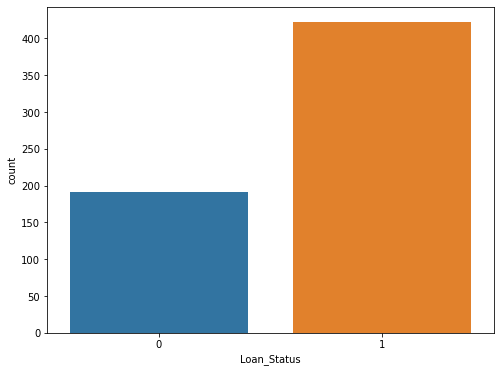

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(target)
yes = target.value_counts()[0]/len(target)
no = target.value_counts()[1]/len(target)
print(f'le pourcentage des credits accordes est:{yes}')
print(f'le pourcentage des credits non accordes est:{no}')


C:\Users\Issam\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Issam\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


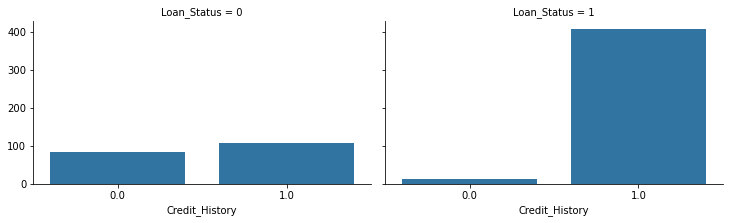

In [17]:
 #Credit history cad la personne a deja un credit ou pas
grid = sns.FacetGrid(data,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Credit_History')

C:\Users\Issam\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Issam\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


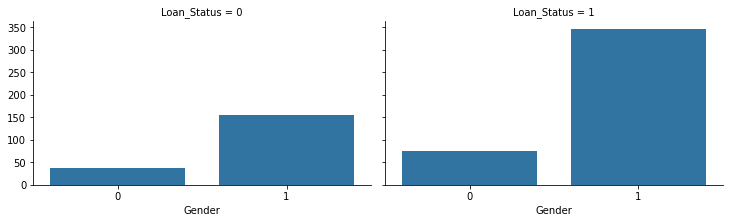

In [18]:
##sex
grid = sns.FacetGrid(data,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Gender')

C:\Users\Issam\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Issam\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


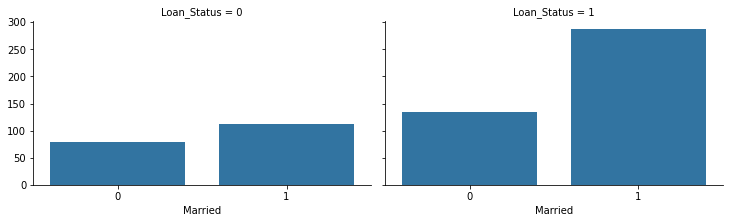

In [19]:
## la colonne maried
grid = sns.FacetGrid(data,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Married')

C:\Users\Issam\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Issam\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


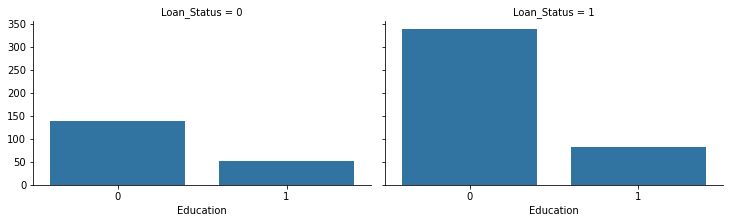

In [20]:
## education
grid = sns.FacetGrid(data,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Education')

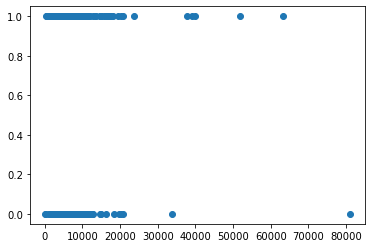

In [21]:
# revenu du demandeur
plt.scatter(data['ApplicantIncome'],data['Loan_Status'])

In [22]:
data.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1,1,0,0,0,1,3833.5,268.0,132.5,360.0,1.0
1,1,1,0,0,0,1,3812.5,1239.5,127.5,360.0,1.0


In [23]:
## realisation du modele 
# diviser la base en une base donnees tesr et d'entrainement
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(X,y):
    X_train,X_test = X.iloc[train],X.iloc[test]
    y_train,y_test = y.iloc[train],y.iloc[test]
print(' X_train taille', X_train.shape)
print(' X_test taille', X_test.shape)
print(' y_train taille', y_train.shape)
print(' y_test taille', y_test.shape)


 X_train taille (491, 11)
 X_test taille (123, 11)
 y_train taille (491,)
 y_test taille (123,)


In [24]:
# appliquer 3 algorithms: LogisticRegression ,KNN, DecisionTree
models={
    ' LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    ' DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1,random_state=42)
}
# la fonction de precision 
def accu(y_true,y_pred,retu=False):
    acc = accuracy_score(y_true,y_pred)
    if retu:
        return acc
    else:
        print(f'la precision du modele est:{acc}')
## la fct d'application des modeles        
def train_test_eval(models,X_train,y_train,X_test,y_test):
    for name,model in models.items():
        print(name,':')
        model.fit(X_train,y_train)
        accu(y_test,model.predict(X_test))
        print('_'*30)
train_test_eval(models,X_train,y_train,X_test,y_test)        

 LogisticRegression :
la precision du modele est:0.8536585365853658
______________________________
KNeighborsClassifier :
la precision du modele est:0.6504065040650406
______________________________
 DecisionTreeClassifier :
la precision du modele est:0.8455284552845529
______________________________


C:\Users\Issam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# nv base donnes pour apliquer notre modele 
X_2 = X[['Credit_History','Married','CoapplicantIncome']]

In [27]:
# diviser la base en une base donnees tesr et d'entrainement
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(X,y):
    X_train,X_test = X.iloc[train],X.iloc[test]
    y_train,y_test = y.iloc[train],y.iloc[test]
print(' X_train taille', X_train.shape)
print(' X_test taille', X_test.shape)
print(' y_train taille', y_train.shape)
print(' y_test taille', y_test.shape)

 X_train taille (491, 11)
 X_test taille (123, 11)
 y_train taille (491,)
 y_test taille (123,)


In [28]:
train_test_eval(models,X_train,y_train,X_test,y_test)        

 LogisticRegression :
la precision du modele est:0.8536585365853658
______________________________
KNeighborsClassifier :
la precision du modele est:0.6504065040650406
______________________________
 DecisionTreeClassifier :
la precision du modele est:0.8455284552845529
______________________________


C:\Users\Issam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
# appLIQUER LA REGRESSION LOGISTIQUE SUR NOTRE BASE DE DONNEE
Classifier = LogisticRegression()
Classifier.fit(X_2,y)


LogisticRegression()

In [33]:
# Enrigestrer le modele
pickle.dump(Classifier,open('model.pkl','wb'))